In [18]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from imblearn.over_sampling import SMOTE
from collections import Counter

In [2]:
# loading the dataset
df = pd.read_csv('/content/data.csv')
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [3]:
# preparing features and target
X = df.drop(columns=['id', 'diagnosis', 'Unnamed: 32'])  # Drop 'id', 'diagnosis' and 'Unnamed: 32' columns for the feature set
y = df['diagnosis'].apply(lambda x: 1 if x == 'M' else 0)  # Convert 'M' to 1 (malignant), 'B' to 0 (benign)

In [4]:
X

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [5]:
y

,diagnosis
0,1
1,1
2,1
3,1
4,1
...,...
564,1
565,1
566,1
567,1


In [12]:
# Assuming 'y' is your target column, which contains 0 (benign) and 1 (malignant)
class_counts = y.value_counts()  # Get the frequency of each class
class_counts

,count
diagnosis,
0,357
1,212


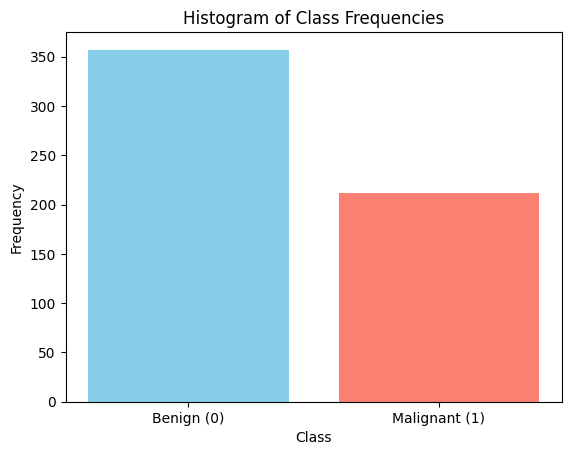

In [13]:
# Plot the histogram
plt.bar(class_counts.index, class_counts.values, tick_label=['Benign (0)', 'Malignant (1)'], color=['skyblue', 'salmon'])

# Add labels and title
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.title('Histogram of Class Frequencies')
plt.show()

In [9]:
# splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Scenario 1: Model performance before applying SMOTE (on imbalanced data)
print("----- Model Performance BEFORE SMOTE (Imbalanced Data) -----")

# training the RandomForest model on the imbalanced dataset
clf_imbalanced = RandomForestClassifier(random_state=42)
clf_imbalanced.fit(X_train, y_train)

# making predictions on the test set
y_pred_imbalanced = clf_imbalanced.predict(X_test)

----- Model Performance BEFORE SMOTE (Imbalanced Data) -----


In [15]:
# Get precision, recall, f1, and accuracy
precision = precision_score(y_test, y_pred_imbalanced)
recall = recall_score(y_test, y_pred_imbalanced)
f1 = f1_score(y_test, y_pred_imbalanced)
accuracy = accuracy_score(y_test, y_pred_imbalanced)

In [16]:
# Print each metric separately
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"Accuracy: {accuracy:.2f}")

Precision: 1.00
Recall: 0.91
F1 Score: 0.95
Accuracy: 0.96


In [21]:
# Scenario 2: Model performance after applying SMOTE (on balanced data)
print("\n----- Model Performance AFTER SMOTE (Balanced Data) -----")

# Apply SMOTE to the training set
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Check the class distribution after applying SMOTE
print(f'Resampled class distribution: {Counter(y_train_resampled)}')


----- Model Performance AFTER SMOTE (Balanced Data) -----
Resampled class distribution: Counter({1: 250, 0: 250})


In [28]:
# Assuming 'y_train_resampled' is your target column, which contains 0 (benign) and 1 (malignant)
class_counts_resampled = y_train_resampled.value_counts()  # Get the frequency of each class
class_counts_resampled

,count
diagnosis,
1,250
0,250


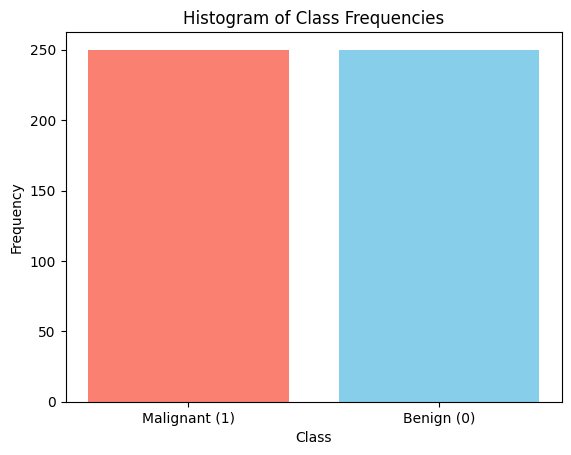

In [29]:
# Plot the histogram
plt.bar(class_counts_resampled.index, class_counts_resampled.values, tick_label=['Benign (0)', 'Malignant (1)'], color=['skyblue', 'salmon'])

# Add labels and title
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.title('Histogram of Class Frequencies')
plt.show()

In [22]:
# Train a RandomForest model on the SMOTE-resampled dataset
clf_resampled = RandomForestClassifier(random_state=42)
clf_resampled.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
y_pred_resampled = clf_resampled.predict(X_test)

In [24]:
# Get precision, recall, f1, and accuracy
precision_resampled = precision_score(y_test, y_pred_resampled)
recall_resampled = recall_score(y_test, y_pred_resampled)
f1_resampled = f1_score(y_test, y_pred_resampled)
accuracy_resampled = accuracy_score(y_test, y_pred_resampled)

In [25]:
# Print each metric separately
print(f"Precision: {precision_resampled:.2f}")
print(f"Recall: {recall_resampled:.2f}")
print(f"F1 Score: {f1_resampled:.2f}")
print(f"Accuracy: {accuracy_resampled:.2f}")

Precision: 0.98
Recall: 0.95
F1 Score: 0.97
Accuracy: 0.98
